# Rarefaction
## Setup

In [1]:
#Libraries
library("phyloseq")
library("microbiome")
library("vegan")
library("IRdisplay")
#Load phyloseq object
load("phyloseq.RData")
#Load ASV count vector
load("num_asvs_vec.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6.1


Attaching package: ‘vegan’


The following object is masked from ‘package:microbiome’:

    diversity




## Rarefaction curve

Warning message in vegan::rarecurve(x = asv_abund_df, step = 50, xlab = "Read depth", :
“most observed count data have counts 1, but smallest count is 2”


png 
  2

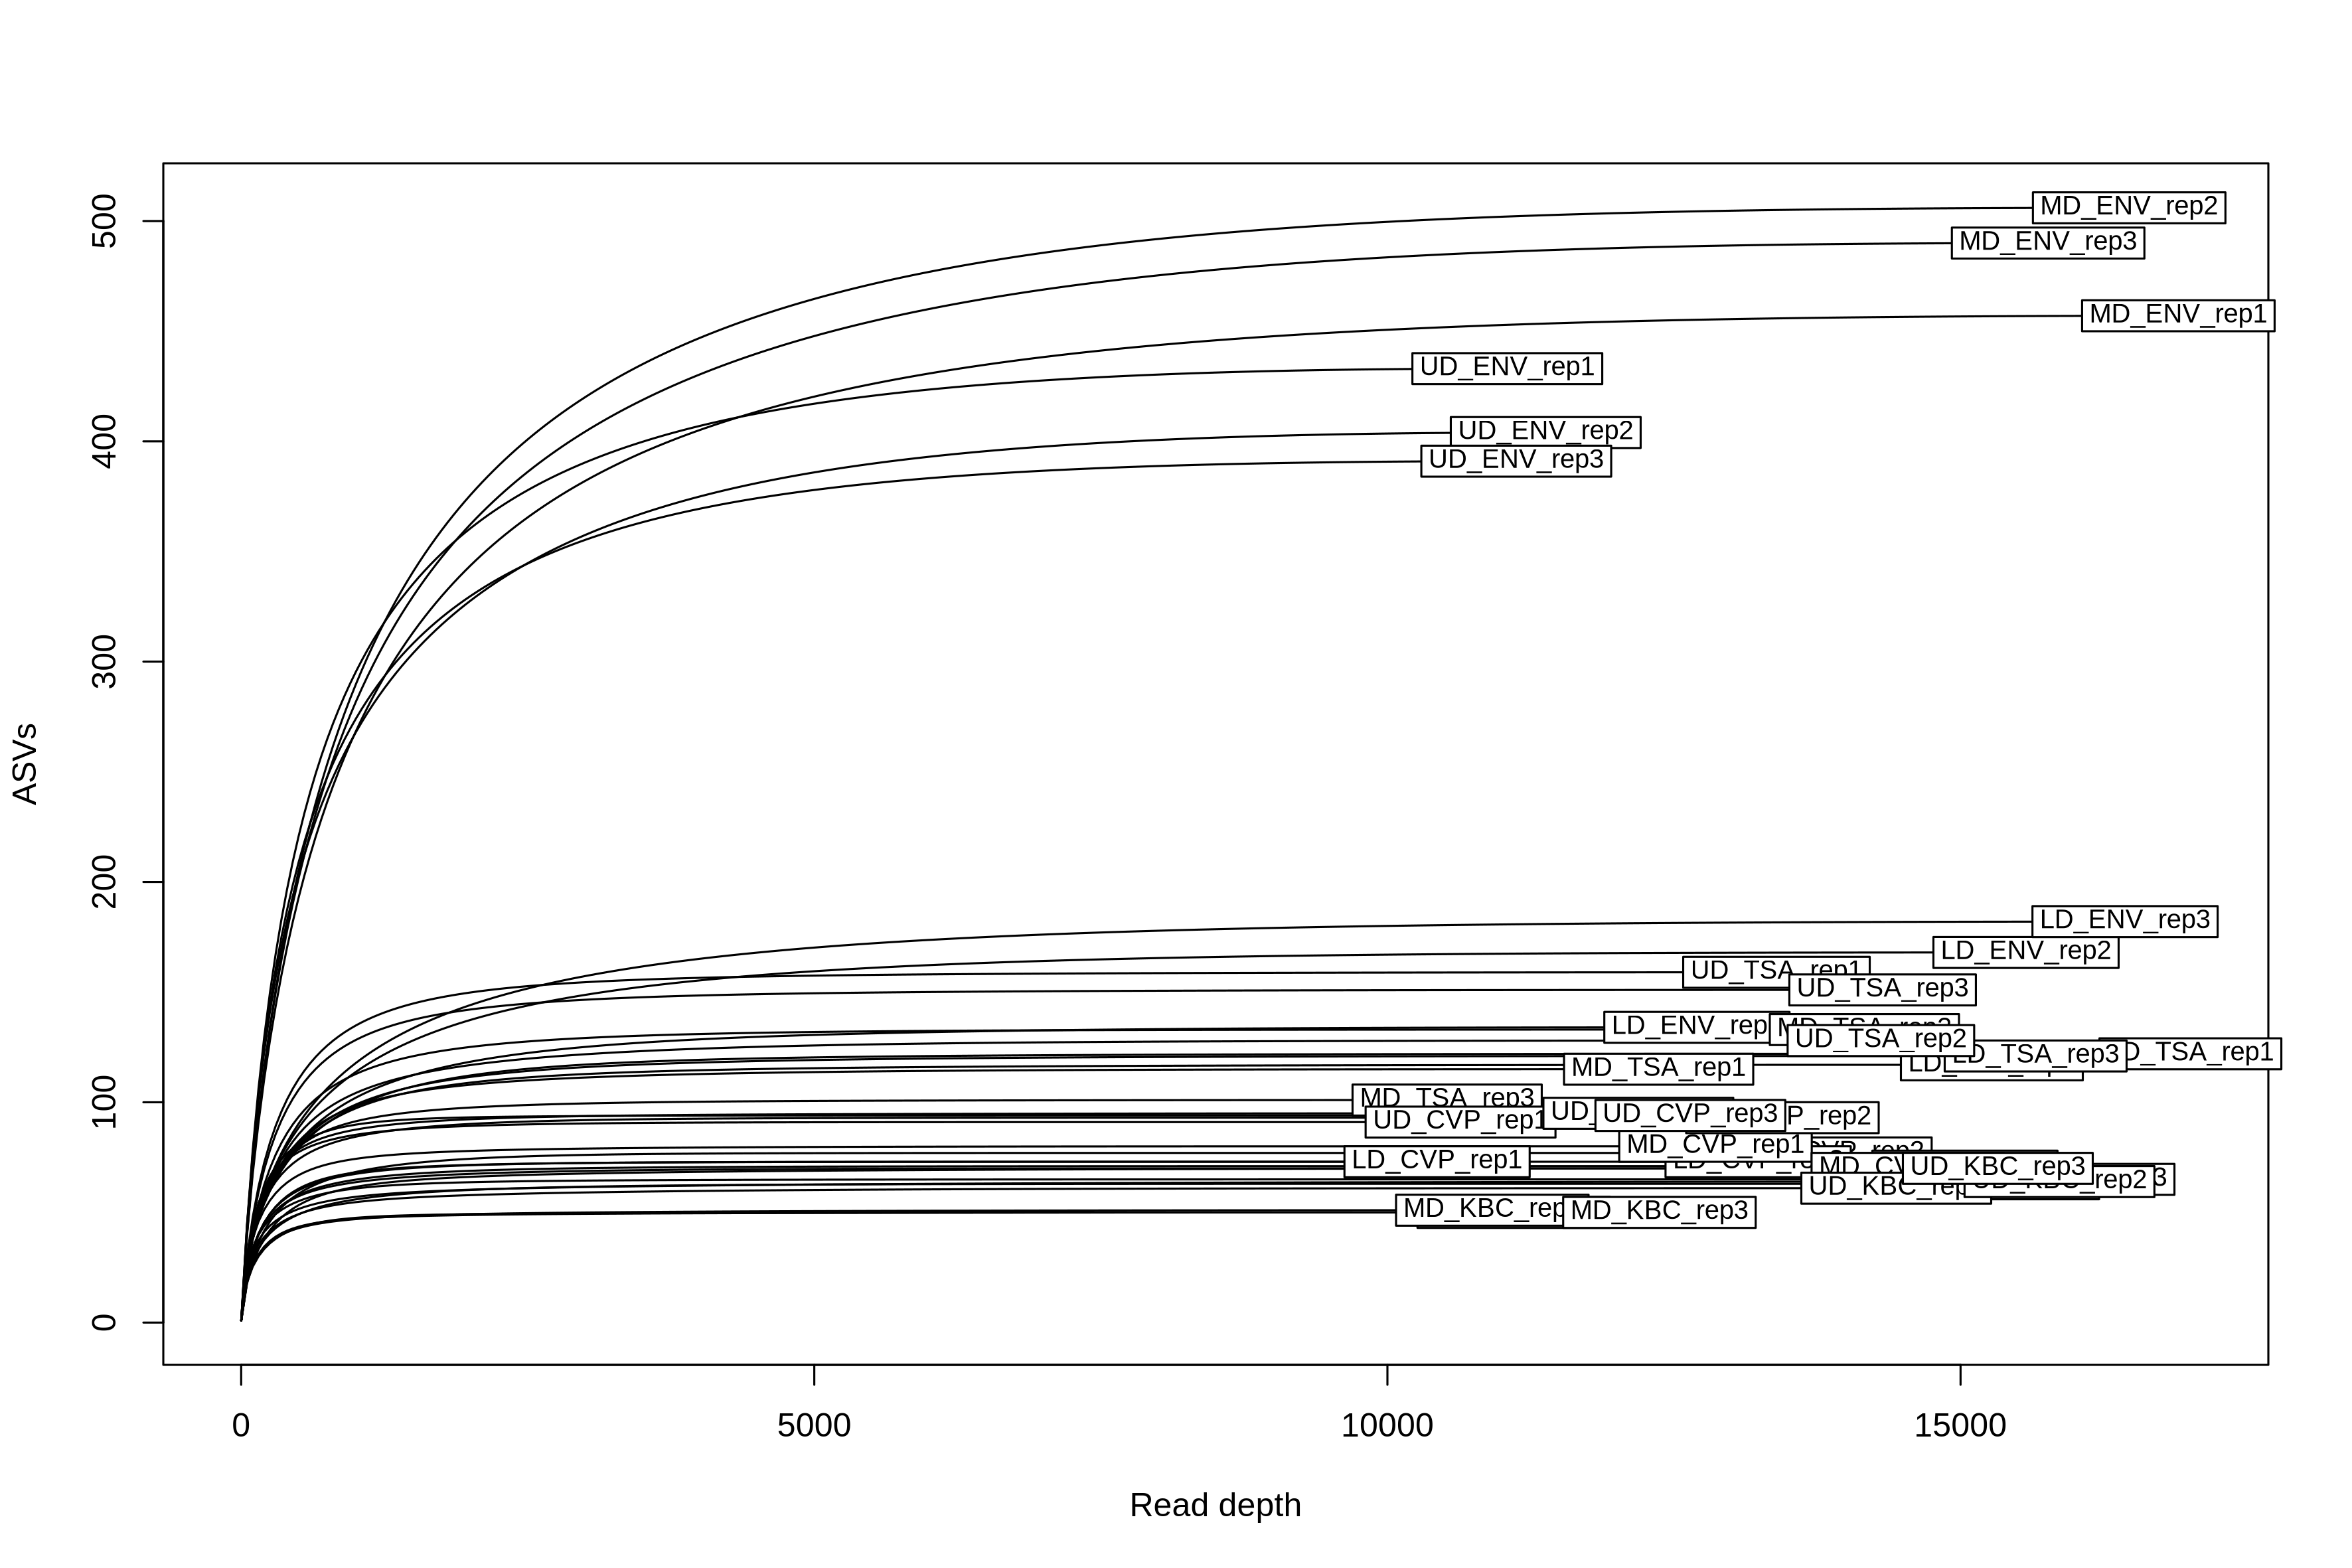

In [2]:
#Extract ASV table as data frame
asv_abund_df <- as.data.frame(t(phyloseq::otu_table(pseq)))
#Rarefaction curve
#Save as png
png(filename = "./rarefaction_plot.png", res = 300,
   units = "mm", height=200, width=300)
#Produce plot
vegan::rarecurve(
    x = asv_abund_df, step = 50,
    xlab = "Read depth",
    ylab = "ASVs"
)
dev.off()
#Display the plot in jupyter notebook
IRdisplay::display_png(file = "./rarefaction_plot.png")

Warning message in vegan::rarecurve(x = asv_abund_df, step = 50, xlab = "Read depth", :
“most observed count data have counts 1, but smallest count is 2”


png 
  2

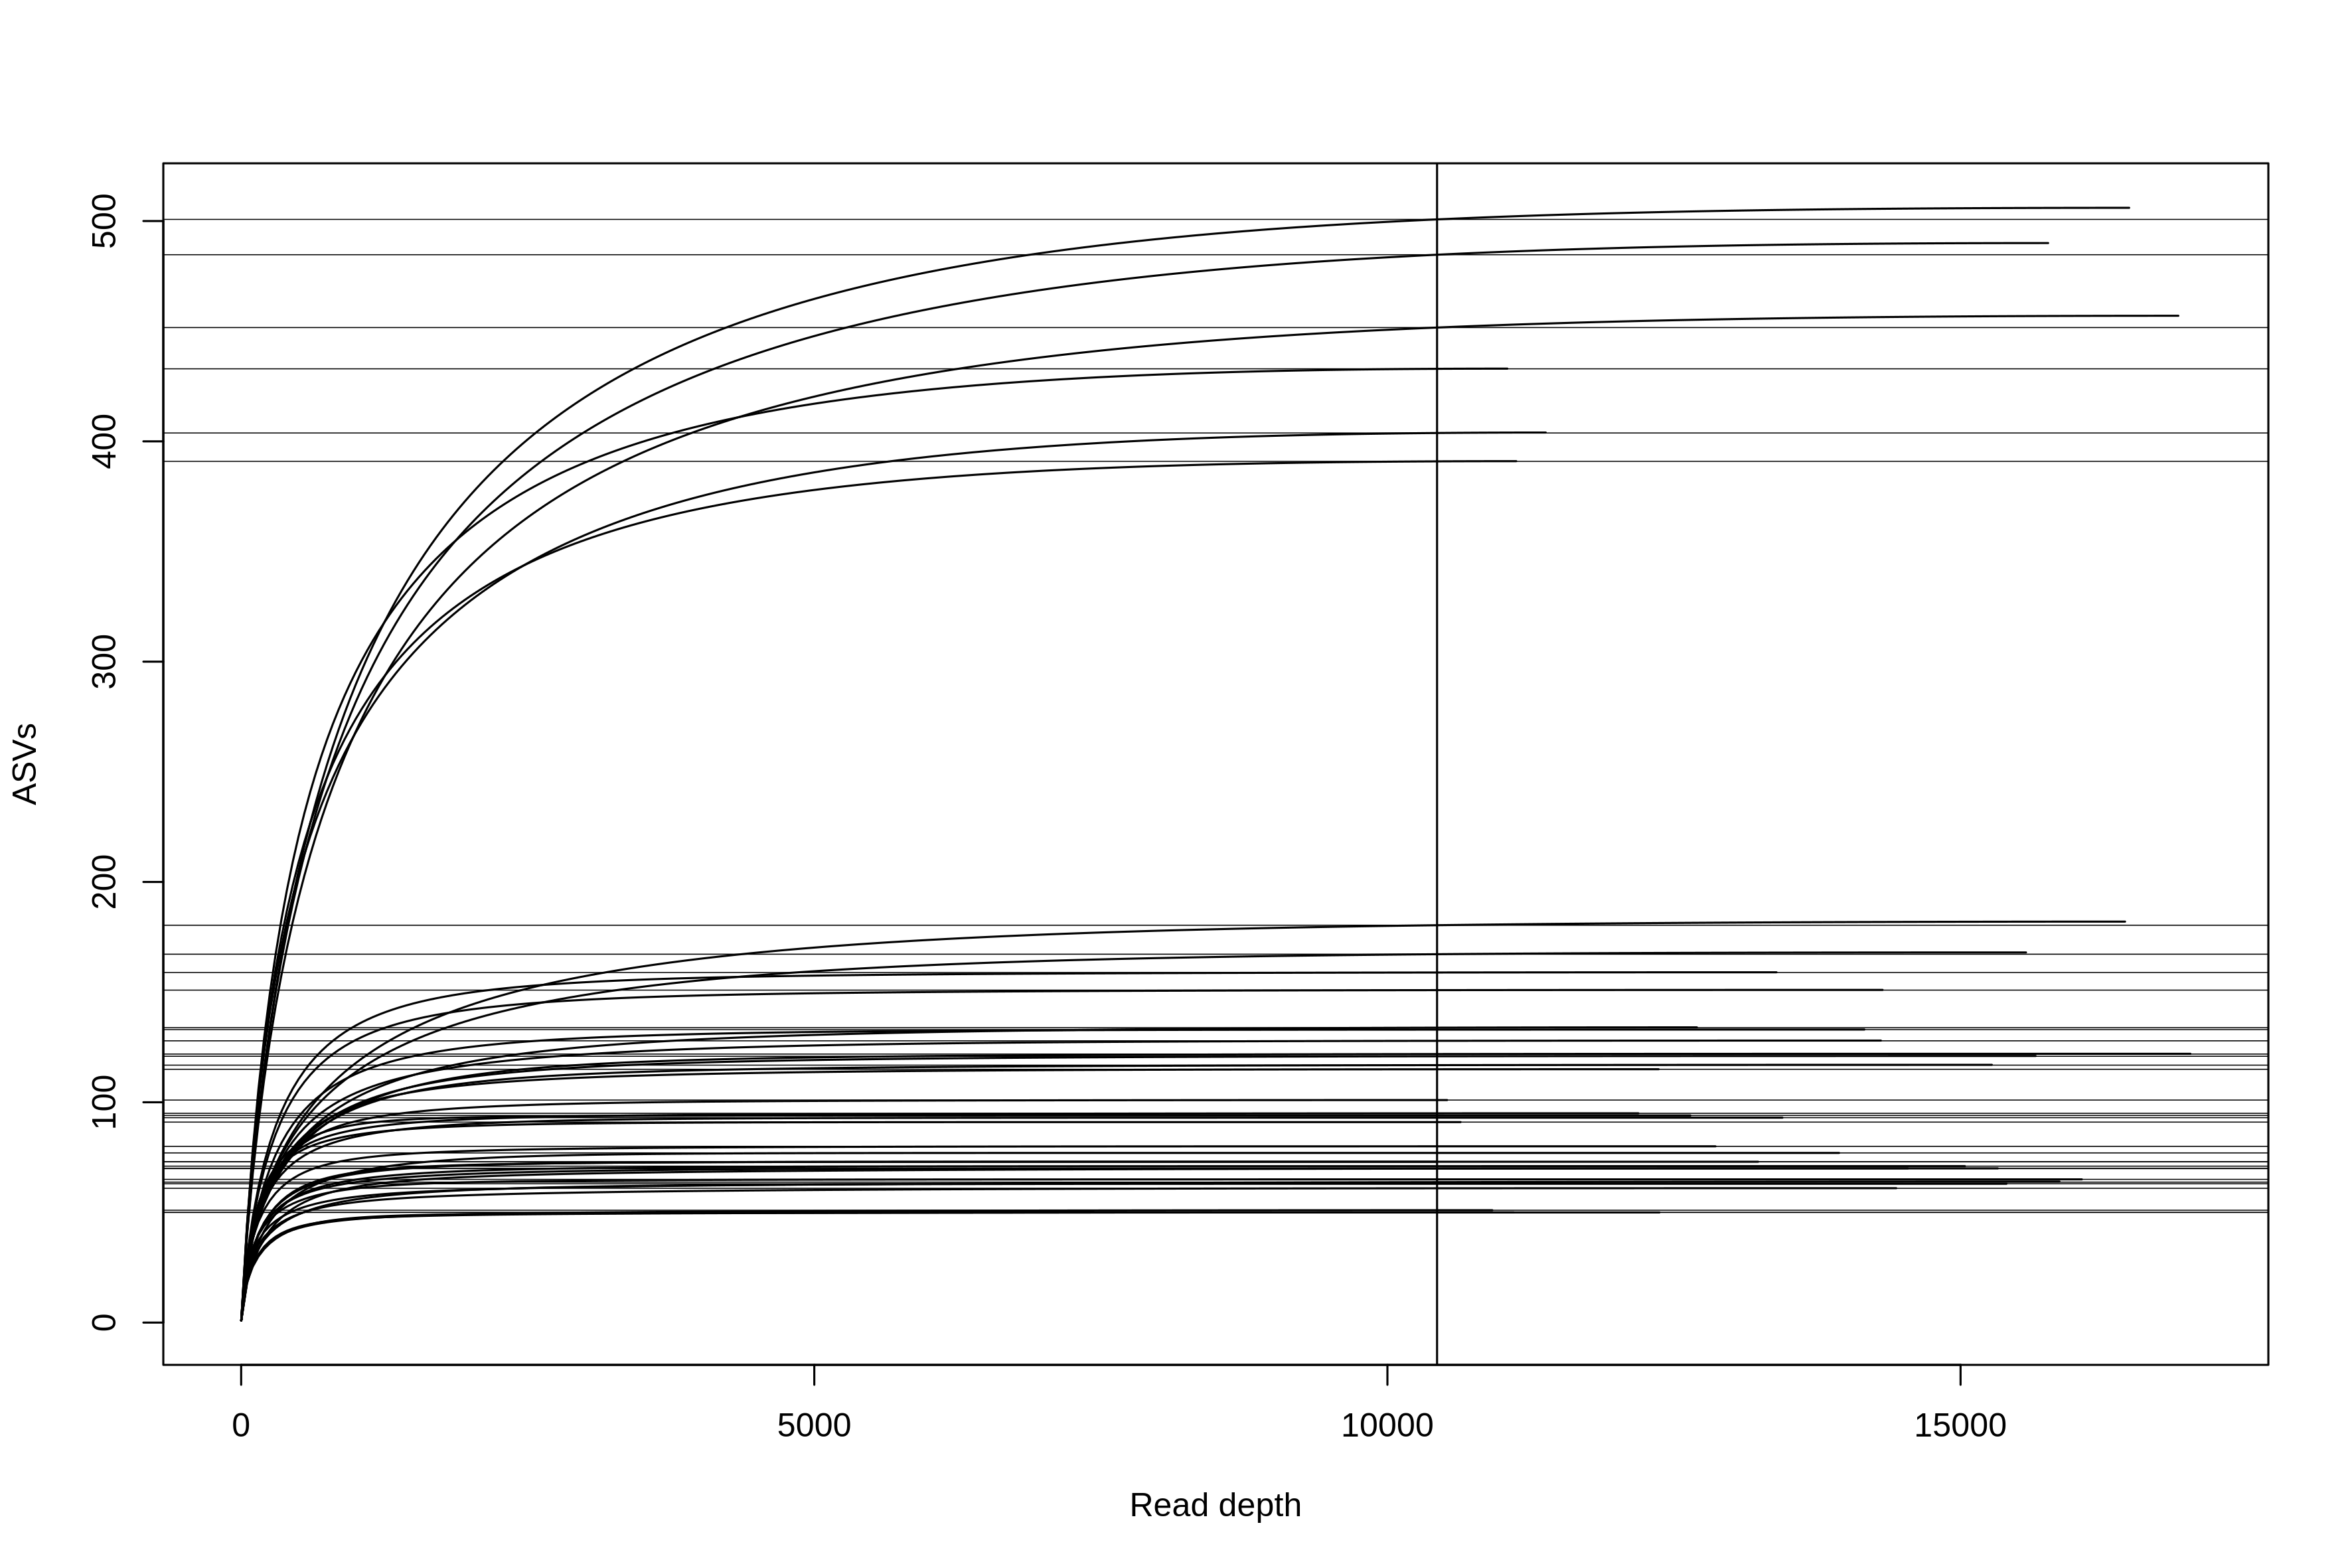

In [3]:
#Improved plot saved as file
png(filename = "./rarefaction_plot.png", res = 300,
   units = "mm", height=200, width=300)
#Plot
vegan::rarecurve(
    x = asv_abund_df, step = 50,
    xlab = "Read depth", ylab="ASVs", lwd=1, label=F,
sample = min(microbiome::readcount(pseq)))
dev.off()
#Display the plot in jupyter notebook
IRdisplay::display_png(file = "./rarefaction_plot.png")

Warning message in vegan::rareslope(x = asv_abund_df, sample = min(microbiome::readcount(pseq))):
“most observed count data have counts 1, but smallest count is 2”


LD_CVP_rep1  UD_CVP_rep1  UD_CVP_rep3  LD_CVP_rep3  LD_CVP_rep2  MD_CVP_rep2 
0.000000e+00 2.855142e-12 1.345334e-09 1.971787e-08 4.645008e-08 9.781206e-07 
 MD_KBC_rep1  MD_TSA_rep3  LD_KBC_rep3  UD_KBC_rep3  MD_CVP_rep1  LD_KBC_rep1 
9.785602e-07 1.581124e-06 1.994470e-06 2.048136e-06 2.634052e-06 2.963782e-06 
 LD_KBC_rep2  MD_KBC_rep3  MD_KBC_rep2  UD_CVP_rep2  MD_TSA_rep2  UD_KBC_rep1 
3.067411e-06 5.957786e-06 8.115228e-06 2.366650e-05 2.444266e-05 3.484727e-05 
 MD_TSA_rep1  MD_CVP_rep3  UD_TSA_rep3  LD_TSA_rep1  UD_TSA_rep1  LD_TSA_rep2 
3.567812e-05 6.273197e-05 6.739143e-05 6.863914e-05 7.174360e-05 7.612747e-05 
 UD_TSA_rep2  LD_TSA_rep3  UD_KBC_rep2  LD_ENV_rep1  UD_ENV_rep3  UD_ENV_rep1 
7.654789e-05 7.688032e-05 9.894690e-05 1.440231e-04 2.539516e-04 2.848284e-04 
 LD_ENV_rep2  UD_ENV_rep2  LD_ENV_rep3  MD_ENV_rep1  MD_ENV_rep2  MD_ENV_rep3 
4.355415e-04 4.603154e-04 6.840631e-04 2.200275e-03 2.368263e-03 2.528810e-03

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 2.035e-06 3.526e-05 2.808e-04 1.102e-04 2.529e-03 

png 
  2

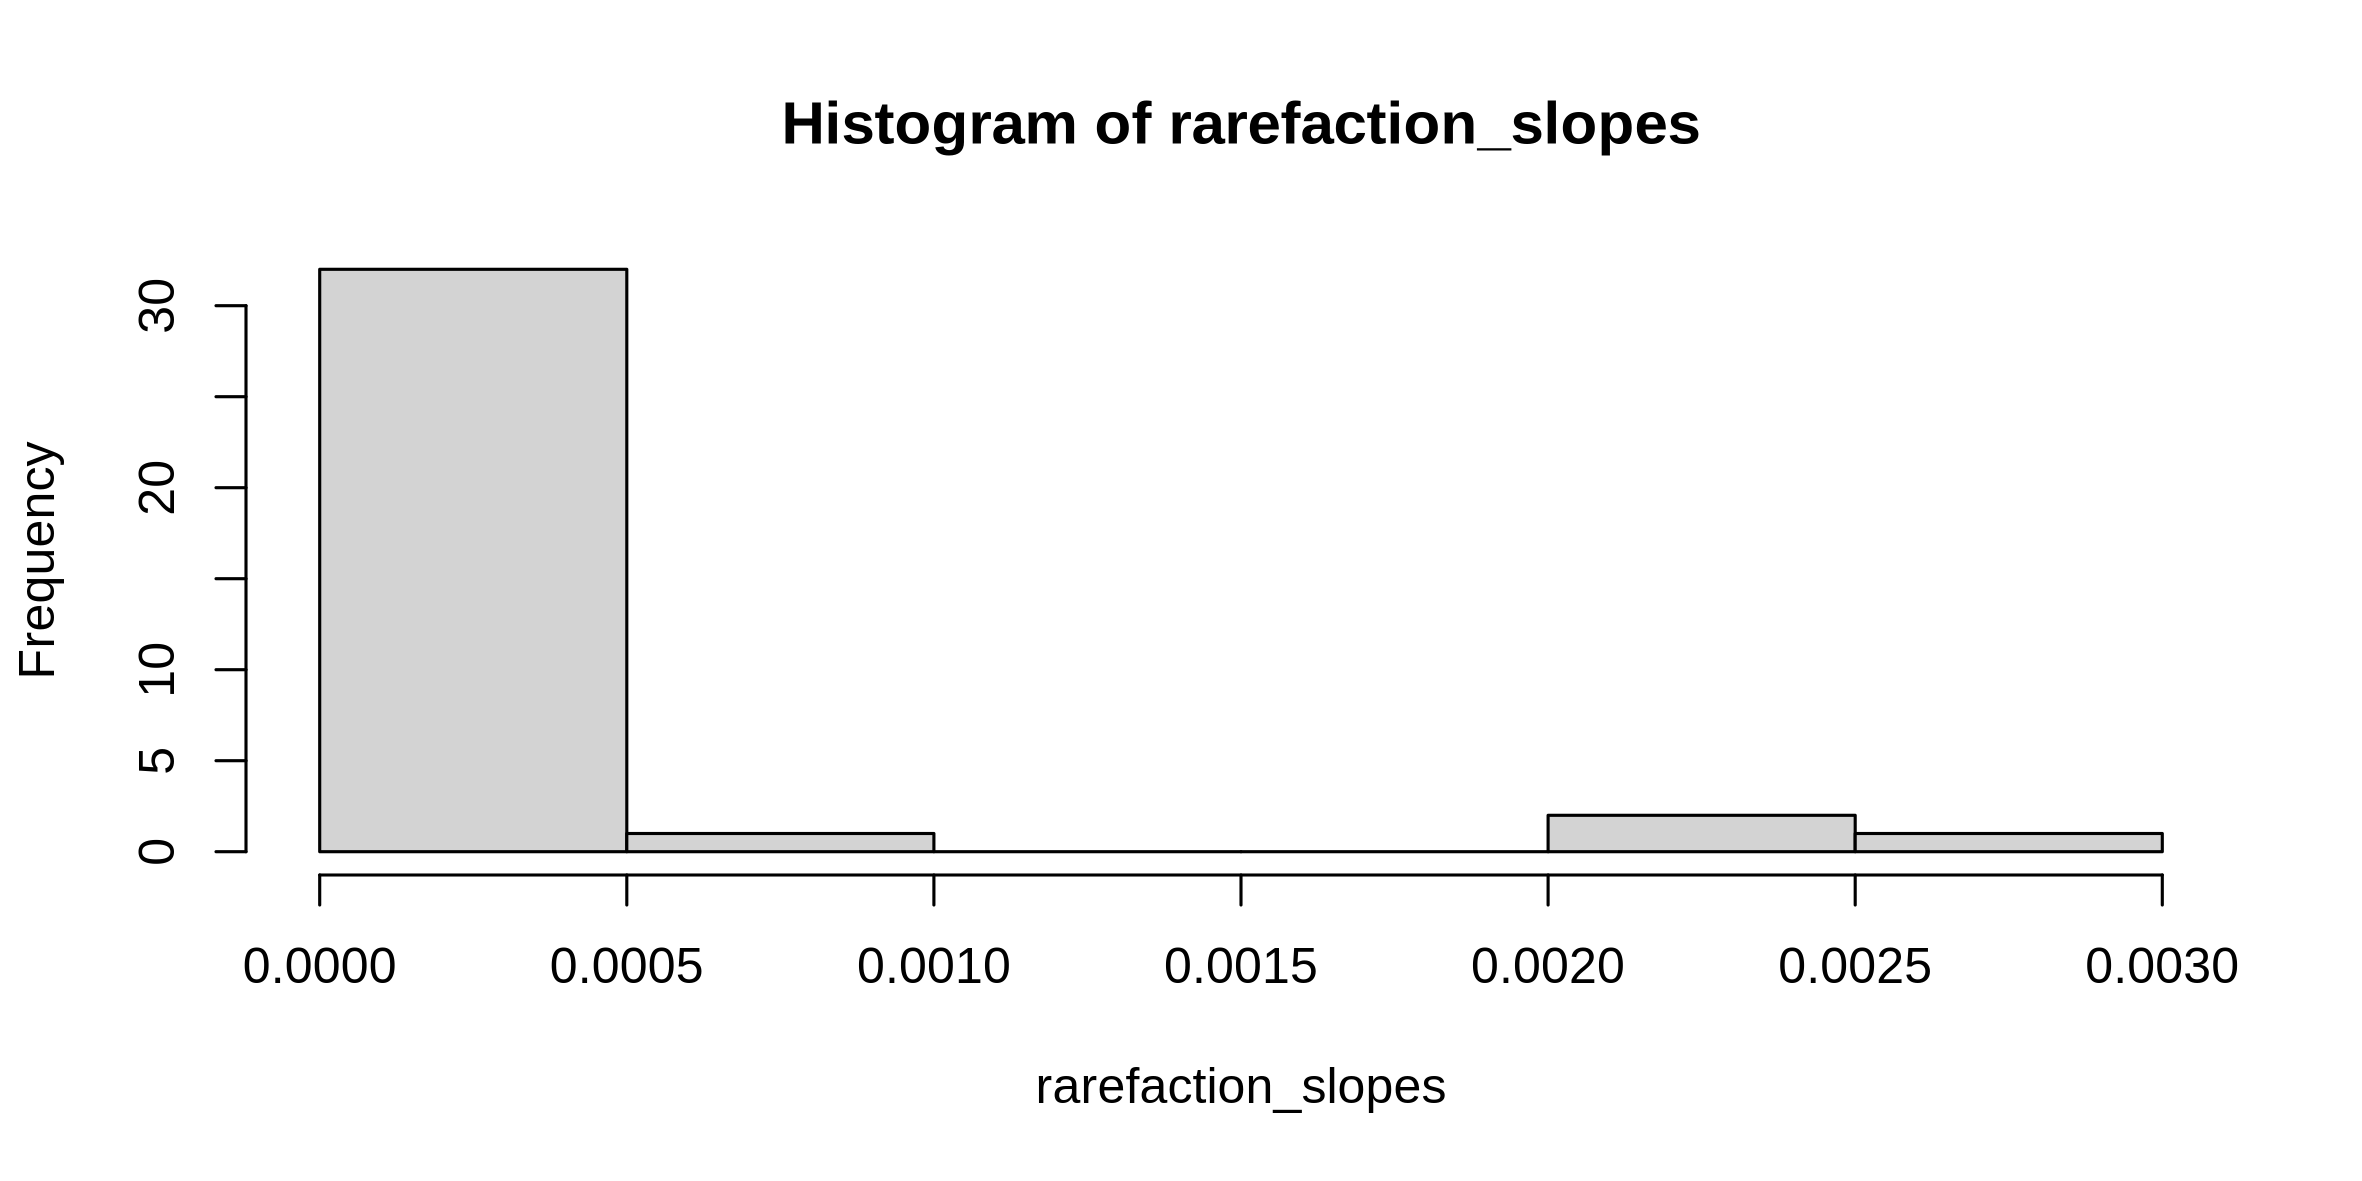

In [4]:
#Rarefaction slopes
rarefaction_slopes  <- vegan::rareslope(
    x = asv_abund_df, sample = min(microbiome::readcount(pseq))
)
#View slopes from lowest to highest value
sort(rarefaction_slopes)
#Summary of slopes
summary(rarefaction_slopes)
#Histogram of slopes
#Save as png
png(filename = "./rarefaction_slopes_histogram.png", res = 300,
   units = "mm", height=100, width=200)
#Plot
hist(rarefaction_slopes)
dev.off()
#Display the plot in jupyter notebook
IRdisplay::display_png(file = "./rarefaction_slopes_histogram.png")

In [5]:
#Rarefy to minimum read depth
pseq_rarefy  <- phyloseq::rarefy_even_depth(
    pseq, sample.size = min(microbiome::readcount(pseq)), 
    rngseed = 1000
)

`set.seed(1000)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1000); .Random.seed` for the full vector

...

53OTUs were removed because they are no longer 
present in any sample after random subsampling


...



In [6]:
#Summarise and check sample counts which should each amount to 10,433
microbiome::summarize_phyloseq(pseq_rarefy)
microbiome::readcount(pseq_rarefy)

Compositional = NO2

1] Min. number of reads = 104332] Max. number of reads = 104333] Total number of reads = 3755884] Average number of reads = 104335] Median number of reads = 104337] Sparsity = 0.9385286006583046] Any OTU sum to 1 or less? YES8] Number of singletons = 1339] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)5.3242594075260210] Number of sample variables are: 5sample.namesitemediareplicatesite.media2



[[1]]
[1] "1] Min. number of reads = 10433"

[[2]]
[1] "2] Max. number of reads = 10433"

[[3]]
[1] "3] Total number of reads = 375588"

[[4]]
[1] "4] Average number of reads = 10433"

[[5]]
[1] "5] Median number of reads = 10433"

[[6]]
[1] "7] Sparsity = 0.938528600658304"

[[7]]
[1] "6] Any OTU sum to 1 or less? YES"

[[8]]
[1] "8] Number of singletons = 133"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)5.32425940752602"

[[10]]
[1] "10] Number of sample variables are: 5"

[[11]]
[1] "sample.name" "site"        "media"       "replicate"   "site.media"

LD_CVP_rep1 LD_CVP_rep2 LD_CVP_rep3 LD_ENV_rep1 LD_ENV_rep2 LD_ENV_rep3 
      10433       10433       10433       10433       10433       10433 
LD_KBC_rep1 LD_KBC_rep2 LD_KBC_rep3 LD_TSA_rep1 LD_TSA_rep2 LD_TSA_rep3 
      10433       10433       10433       10433       10433       10433 
MD_CVP_rep1 MD_CVP_rep2 MD_CVP_rep3 MD_ENV_rep1 MD_ENV_rep2 MD_ENV_rep3 
      10433       10433       10433       10433       10433       10433 
MD_KBC_rep1 MD_KBC_rep2 MD_KBC_rep3 MD_TSA_rep1 MD_TSA_rep2 MD_TSA_rep3 
      10433       10433       10433       10433       10433       10433 
UD_CVP_rep1 UD_CVP_rep2 UD_CVP_rep3 UD_ENV_rep1 UD_ENV_rep2 UD_ENV_rep3 
      10433       10433       10433       10433       10433       10433 
UD_KBC_rep1 UD_KBC_rep2 UD_KBC_rep3 UD_TSA_rep1 UD_TSA_rep2 UD_TSA_rep3 
      10433       10433       10433       10433       10433       10433

In [7]:
#ASV counts
#Add relative abundance ASV count
num_asvs_vec["rarefied"] <- nrow(phyloseq::otu_table(pseq_rarefy))
num_asvs_vec

abundance  rarefied 
     2551      2498

In [8]:
#Phyloseq save
save(pseq_rarefy, file="phyloseq_rarefied.RData")
#ASV count save
save(num_asvs_vec, file = "num_asvs_vec.v2.RData")